In [218]:
# ARIMA resources:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://machinelearningmastery.com/tune-arima-parameters-python/
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [94]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #for FAC and FACP
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999 #To visualize the whole grid of columns

In [23]:
# Importing datasets (Wise):
Crypto = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/Crypto_general.csv")
df_crypto = pd.DataFrame(Crypto)

BAT = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/BAT.csv")
df_BAT = pd.DataFrame(BAT)

stellar = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/Stellar.csv")
df_stellar = pd.DataFrame(stellar)

vechain = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/VeChain.csv")
df_vechain = pd.DataFrame(vechain)

binanceCoin = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/BinanceCoin.csv")
df_binanceCoin = pd.DataFrame(binanceCoin)

decred = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/Decred.csv")
df_decred = pd.DataFrame(decred)

ICON = pd.read_csv(r"C:\Users\rciri\Desktop\WiseTrust\Coin Excel/ICON.csv")
df_ICON = pd.DataFrame(ICON)

In [2]:
# Importing datasets (Home):
Crypto = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/Crypto_general.csv")
df_crypto = pd.DataFrame(Crypto)

BAT = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/BAT.csv")
df_BAT = pd.DataFrame(BAT)

stellar = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/Stellar.csv")
df_stellar = pd.DataFrame(stellar)

vechain = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/VeChain.csv")
df_vechain = pd.DataFrame(vechain)

binanceCoin = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/BinanceCoin.csv")
df_binanceCoin = pd.DataFrame(binanceCoin)

decred = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/Decred.csv")
df_decred = pd.DataFrame(decred)

ICON = pd.read_csv(r"C:\Users\rafae\Desktop\WiseTrust\Coin Excel/ICON.csv")
df_ICON = pd.DataFrame(ICON)

In [ ]:
# ARIMA: Modelo auto-regressivo integrado de médias móveis:

# Busca entender melhor os dados ou para prever pontos futuros na série. 
# Modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, 
# em que um passo inicial de diferenciação (correspondente à parte "integrada" do modelo) pode ser aplicado 
# uma ou mais vezes para eliminar a não estacionariedade.

# A parte auto-regressiva (AR) do modelo ARIMA indica que a variável evoluinte de interesse é regressada em seus 
# próprios valores defasados, isto é, anteriores. A parte de média móvel (MA) indica que o erro de regressão é na 
# verdade uma combinação linear dos termos de erro, cujos valores ocorreram contemporaneamente e em vários momentos 
# no passado. A parte integrada (I) indica que os valores de dados foram substituídos com a diferença entre seus valores
# e os valores anteriores e este processo diferenciador pode ter sido realizado mais de uma vez. O propósito da cada uma 
# destas características é fazer o modelo se ajustar aos dados da melhor forma possível.

# BAT:

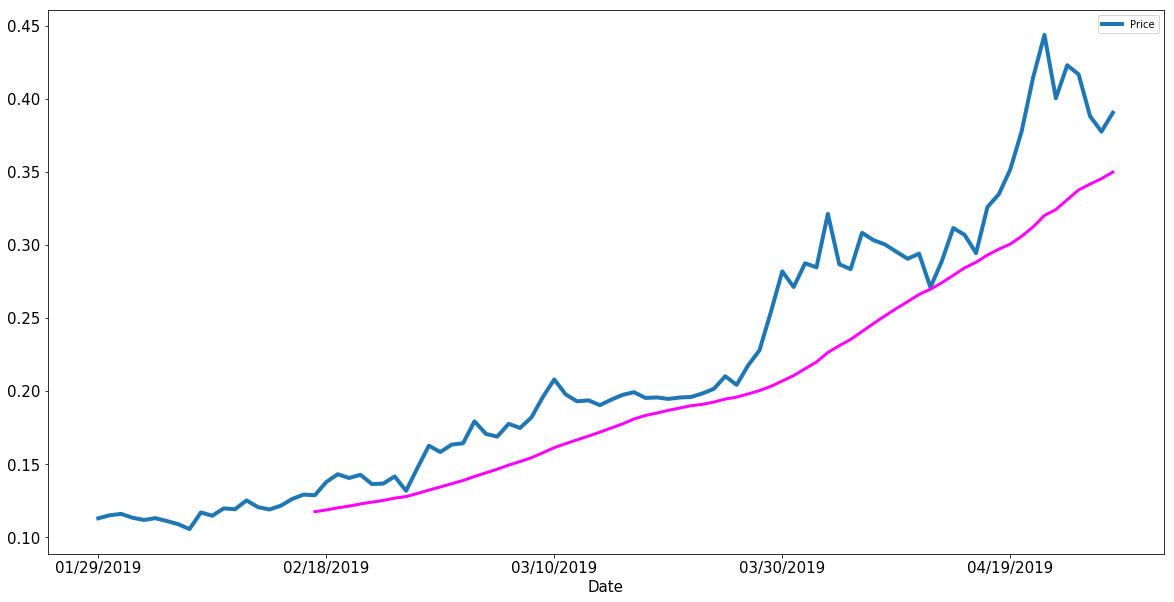

In [39]:
# Chart:
df_BAT["Open"]=df_BAT["Open"].astype(float)
df_BAT.plot("Date", "Open", label="Price", figsize=(20,10), linewidth=4, fontsize=15)
plt.xlabel('Date', fontsize=15)

# MA:
# rolling_mean = BAT["Open"].rolling(window=5).mean()
rolling_mean2 = BAT["Open"].rolling(window=20).mean()
# rolling_mean.plot(label='5 Day SMA', color='orange')
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

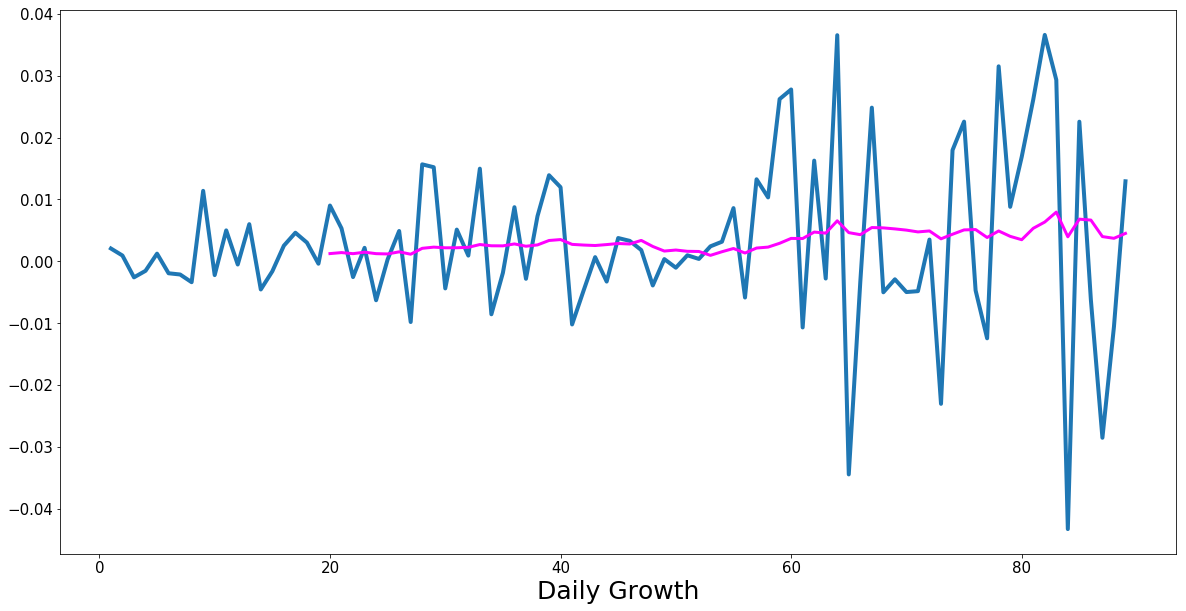

In [20]:
# Growth Chart (First Difference):
BATdiff = df_BAT["Open"].diff()
df_BAT["Open"].diff().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Daily Growth', fontsize=25);

# MA:
rolling_mean2 = BATdiff.rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

In [60]:
# Volatility (Standard Devation):
print("BAT Daily Avarage Volatility: " + str(round(np.std(BAT["Open"])*100, 2)) +"%")

# 3 Month Returns:
print("BAT 3 Month Return: " + str(round(max(BAT["Open"])*100/min(BAT["Open"]),2)) +"%")

BAT Avarage Daily Volatility: 9.15%
BAT 3 Month Return: 420.64%


In [109]:
# Transformation:
df_BAT["Open"]=df_BAT["Open"].astype(float)
BAT_open = BAT['Open']
BAT_diff = df_BAT["Open"].diff()
BAT_log = np.log(BAT_open)
BAT_log_diff = np.log(BAT_open).diff(periods=1).dropna()
# BAT_log_diff.describe()

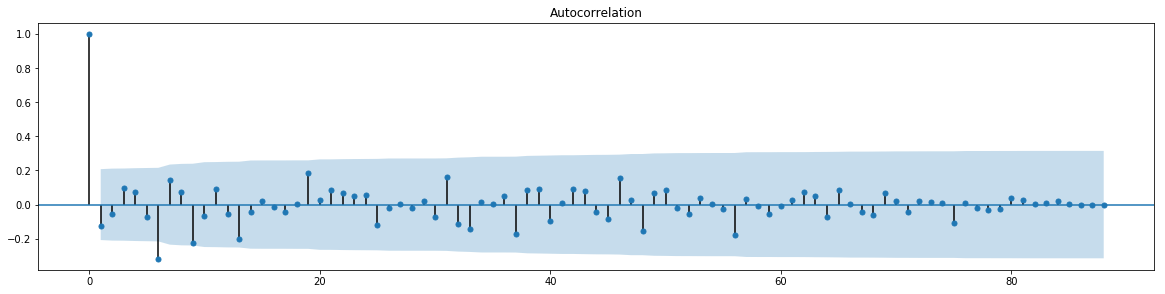

In [92]:
# Autocorrelation function (First difference and log):
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(BAT_log_diff, alpha=0.05, ax=ax1)

In [ ]:
# Arima Model with Out-of-Time Cross validation:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [164]:
# Train and test set:
train = BAT_log[:65]
test = BAT_log[65:]

In [168]:
# Predicted values:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(trend='c', disp=-1)
# print(model_fit.summary())

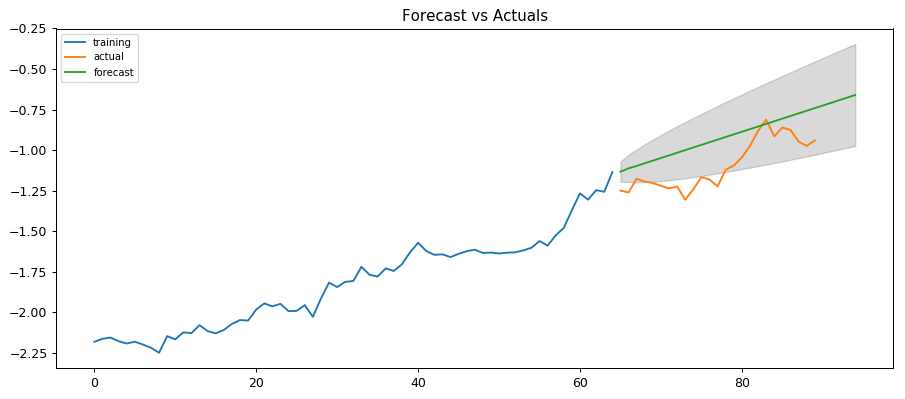

In [166]:
# Forecasting:
fc, se, conf = model_fit.forecast(steps=30, alpha=0.15)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=90)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Stellar:

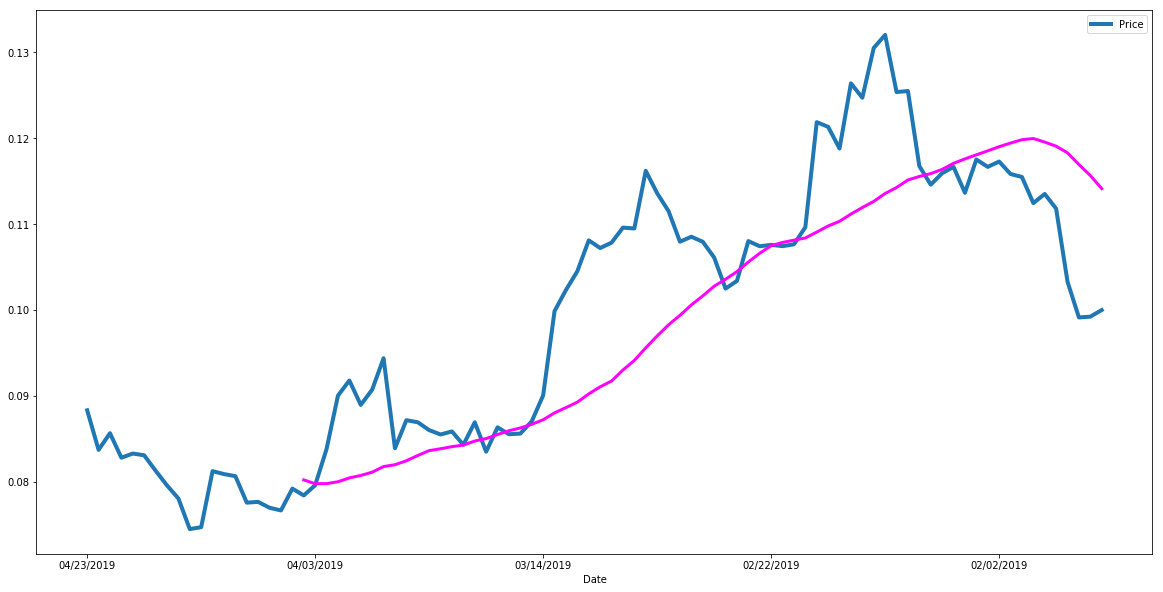

In [12]:
# Chart:
df_stellar["Open"]=df_stellar["Open"].astype(float)
df_stellar.plot("Date", "Open", label="Price", figsize=(20,10), linewidth=4, fontsize=25)

# rolling_mean = stellar["Open"].rolling(window=5).mean()
rolling_mean2 = stellar["Open"].rolling(window=20).mean()

# rolling_mean.plot(label='5 Day SMA', color='orange')
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3)

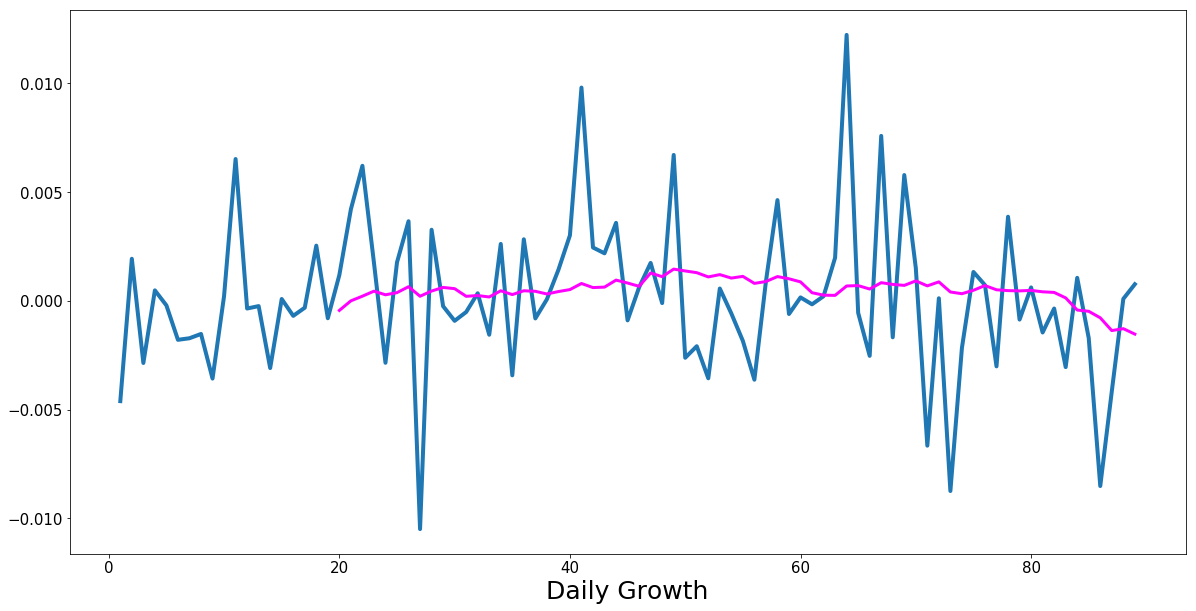

In [21]:
# Growth Chart (First Difference):
stellar_diff = df_stellar["Open"].diff()
df_stellar["Open"].diff().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Daily Growth', fontsize=25);

# MA:
rolling_mean2 = stellar_diff.rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

In [205]:
# Volatility (Standard Devation):
print("Stellar Daily Avarage Volatility: " + str(round(np.std(df_stellar["Open"])*100, 2)) +"%")

# 3 Month Returns:
print("Stellar 3 Month Return: " + str(round(max(df_stellar["Open"])*100/min(df_stellar["Open"]),2)) +"%")

Stellar Daily Avarage Volatility: 1.58%
Stellar 3 Month Return: 177.22%


In [169]:
# Transformation:
df_stellar["Open"]=df_stellar["Open"].astype(float)
stellar_open = stellar['Open']
stellar_diff = df_stellar["Open"].diff()
stellar_log = np.log(stellar_open)
stellar_log_diff = np.log(stellar_open).diff(periods=1).dropna()
# BAT_log_diff.describe()

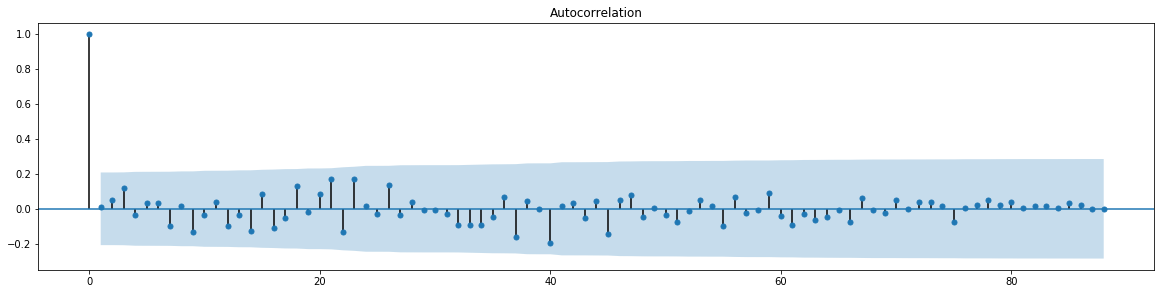

In [170]:
# Autocorrelation function (First difference and log):
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stellar_log_diff, alpha=0.05, ax=ax1)

In [177]:
# Train and test set:
train = stellar_log[:60]
test = stellar_log[60:]

In [178]:
# Predicted values:
model = ARIMA(train, order=(1,1,0)) # Not stationary
model_fit = model.fit(trend='c', disp=-1)
# print(model_fit.summary())

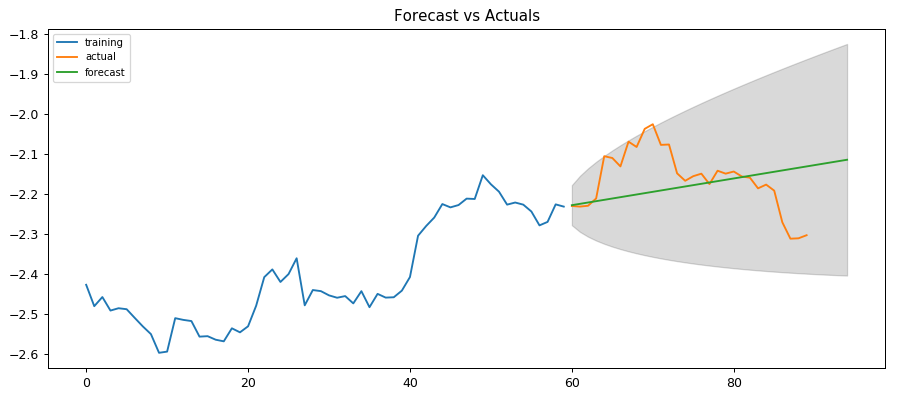

In [180]:
# Forecasting:
fc, se, conf = model_fit.forecast(steps=35, alpha=0.15)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=90)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# VeChain:

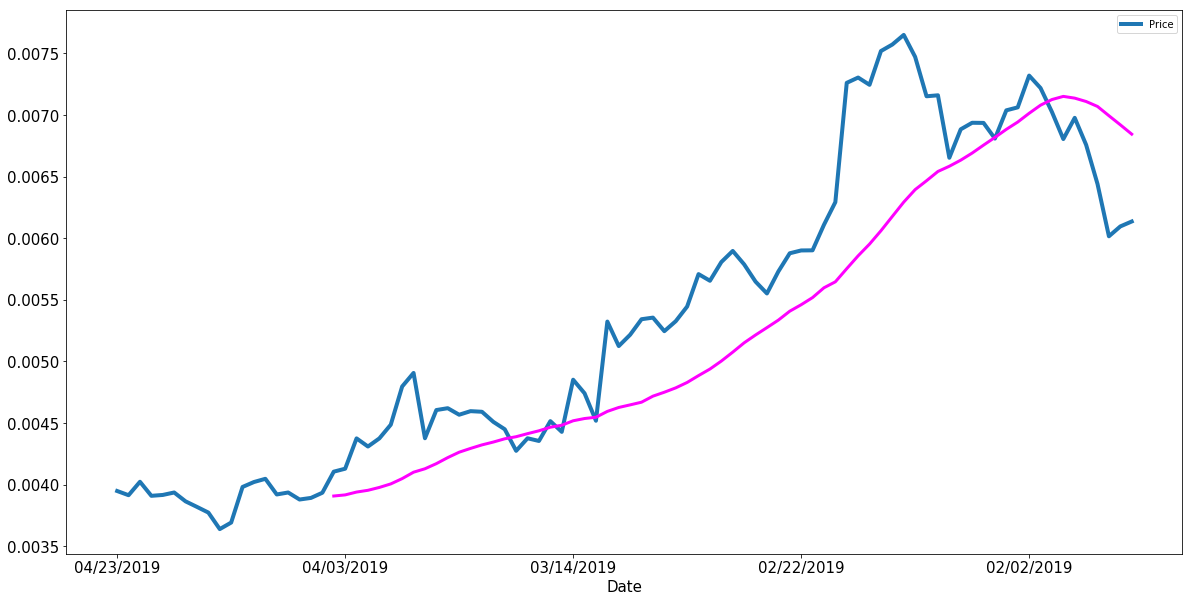

In [181]:
# Chart:
df_vechain["Open"]=df_vechain["Open"].astype(float)
df_vechain.plot("Date", "Open", label="Price", figsize=(20,10), linewidth=4, fontsize=15)
plt.xlabel('Date', fontsize=15)

# MA:
rolling_mean2 = vechain["Open"].rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

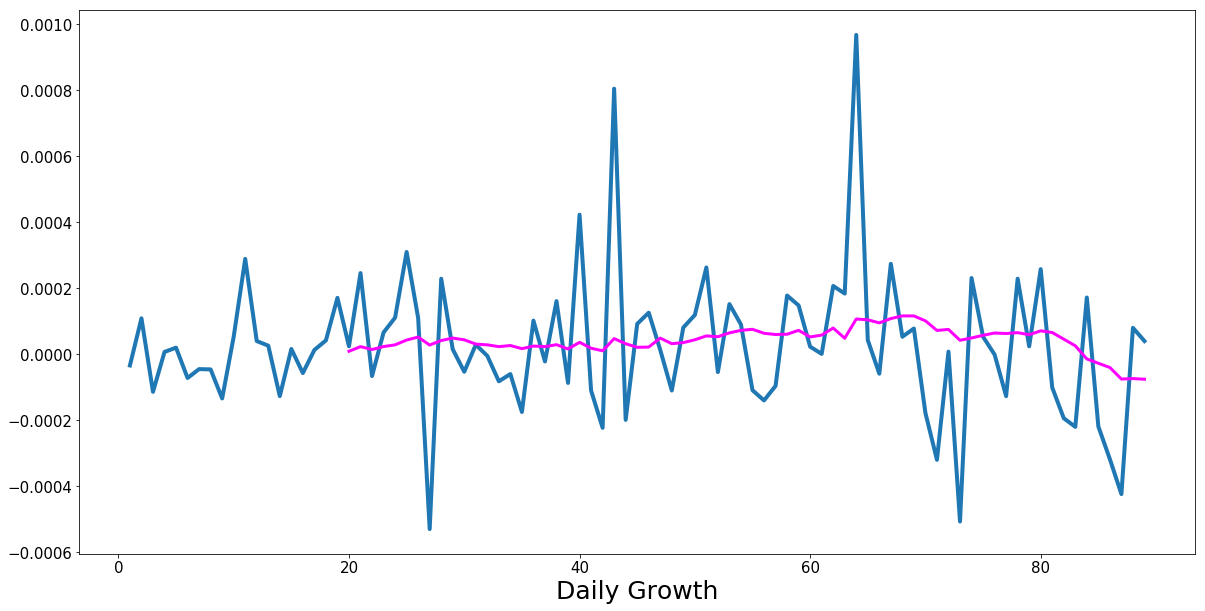

In [183]:
# Growth Chart (First Difference):
vechaindiff = df_vechain["Open"].diff()
df_vechain["Open"].diff().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Daily Growth', fontsize=25);

# MA:
rolling_mean2 = vechaindiff.rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

In [187]:
# Volatility (Standard Devation):
print("VeChain Daily Avarage Volatility: " + str(round(np.std(df_vechain["Open"])*100, 2)) +"%")

# 3 Month Returns:
print("Vechain 3 Month Return: " + str(round(max(df_vechain["Open"])*100/min(vechain["Open"]),2)) +"%")

VeChain Daily Avarage Volatility: 0.12%
Vechain 3 Month Return: 210.16%


In [188]:
# Transformation:
df_vechain["Open"]=df_vechain["Open"].astype(float)
vechain_open = vechain['Open']
vechain_diff = df_vechain["Open"].diff()
vechain_log = np.log(vechain_open)
vechain_log_diff = np.log(vechain_open).diff(periods=1).dropna()
# BAT_log_diff.describe()

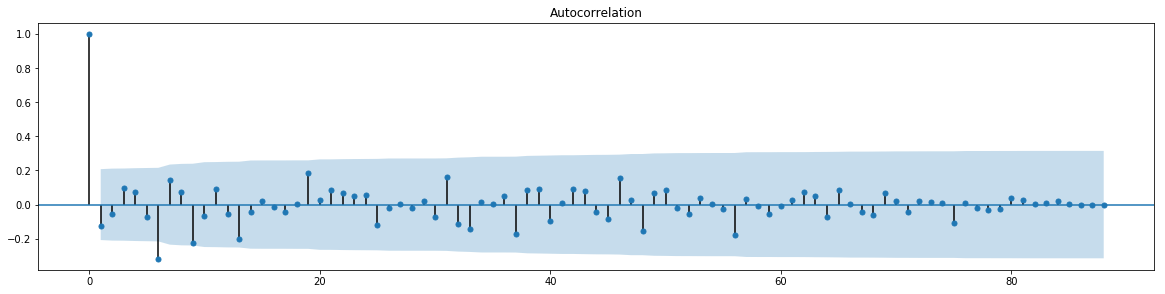

In [189]:
# Autocorrelation function (First difference and log):
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(BAT_log_diff, alpha=0.05, ax=ax1)

In [190]:
# Train and test set:
train = vechain_log[:65]
test = vechain_log[65:]

In [191]:
# Predicted values:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(trend='c', disp=-1)
# print(model_fit.summary())

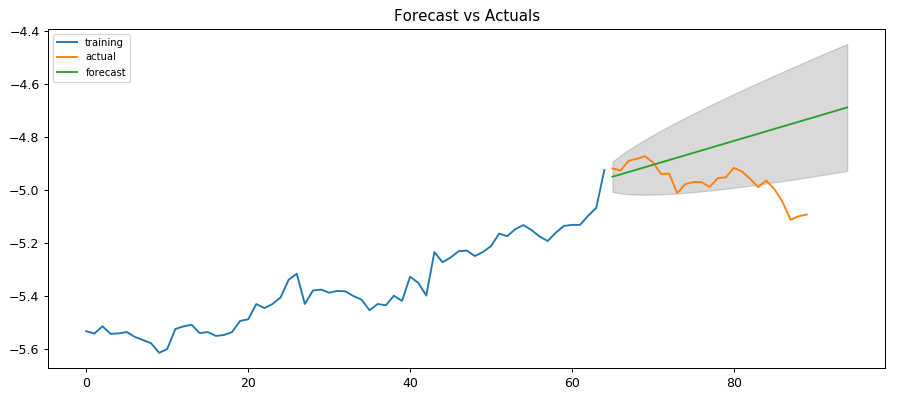

In [192]:
# Forecasting:
fc, se, conf = model_fit.forecast(steps=30, alpha=0.15)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=90)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# BinanceCoin:

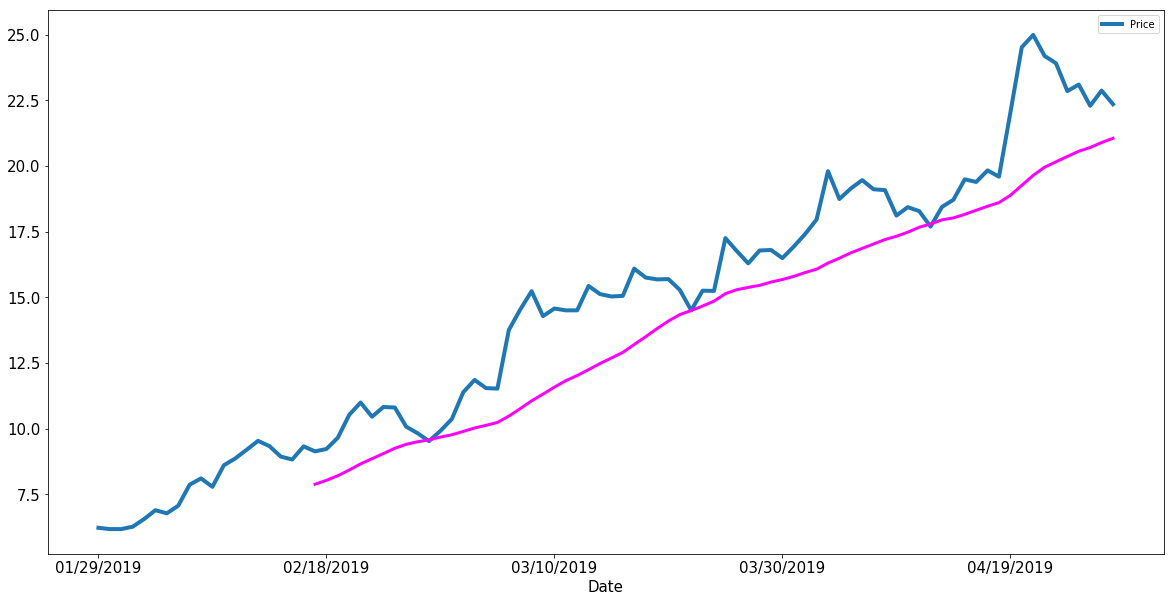

In [186]:
# Chart:
df_binanceCoin["Open"]=df_binanceCoin["Open"].astype(float)
df_binanceCoin.plot("Date", "Open", label="Price", figsize=(20,10), linewidth=4, fontsize=15)
plt.xlabel('Date', fontsize=15)

# MA:
rolling_mean2 = binanceCoin["Open"].rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

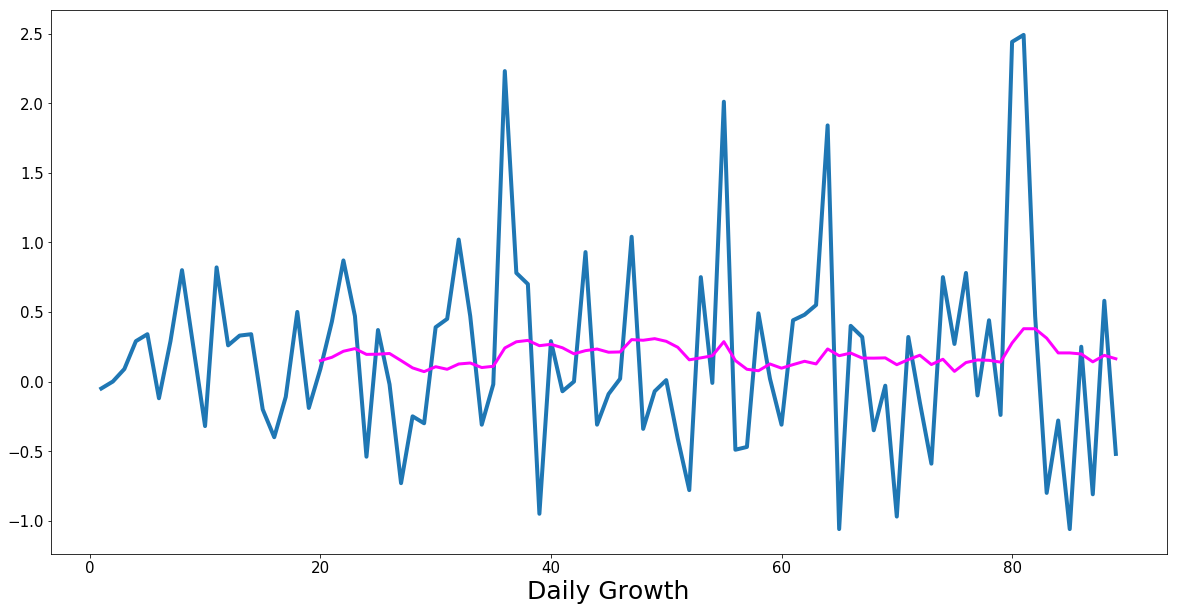

In [193]:
# Growth Chart (First Difference):
binanceCoindiff = df_binanceCoin["Open"].diff()
df_binanceCoin["Open"].diff().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Daily Growth', fontsize=25);

# MA:
rolling_mean2 = binanceCoindiff.rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

In [194]:
# Volatility (Standard Devation):
print("BinanceCoin Daily Avarage Volatility: " + str(round(np.std(binanceCoin["Open"])*100, 2)) +"%")

# 3 Month Returns:
print("BinanceCoin 3 Month Return: " + str(round(max(binanceCoin["Open"])*100/min(binanceCoin["Open"]),2)) +"%")

BinanceCoin Daily Avarage Volatility: 510.6%
BinanceCoin 3 Month Return: 405.02%


In [195]:
# Transformation:
df_binanceCoin["Open"]=df_binanceCoin["Open"].astype(float)
binanceCoin_open = binanceCoin['Open']
binanceCoin_diff = df_binanceCoin["Open"].diff()
binanceCoin_log = np.log(binanceCoin_open)
binanceCoin_log_diff = np.log(binanceCoin_open).diff(periods=1).dropna()
# BAT_log_diff.describe()

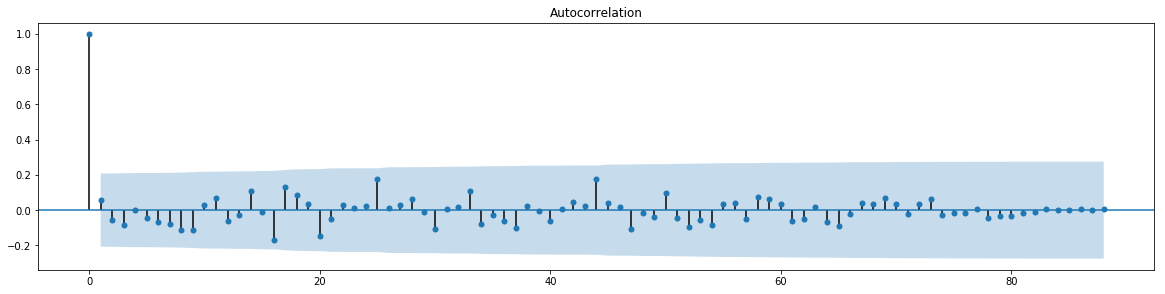

In [196]:
# Autocorrelation function (First difference and log):
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(binanceCoin_log_diff, alpha=0.05, ax=ax1)

In [197]:
# Train and test set:
train = binanceCoin_log[:65]
test = binanceCoin_log[65:]

In [199]:
# Predicted values:
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit(trend='c', disp=-1)
# print(model_fit.summary())

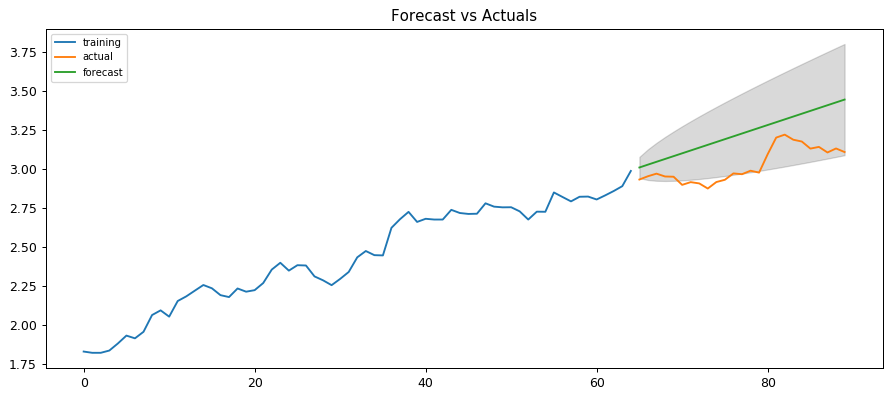

In [201]:
# Forecasting:
fc, se, conf = model_fit.forecast(steps=25, alpha=0.15)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=90)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Decred:

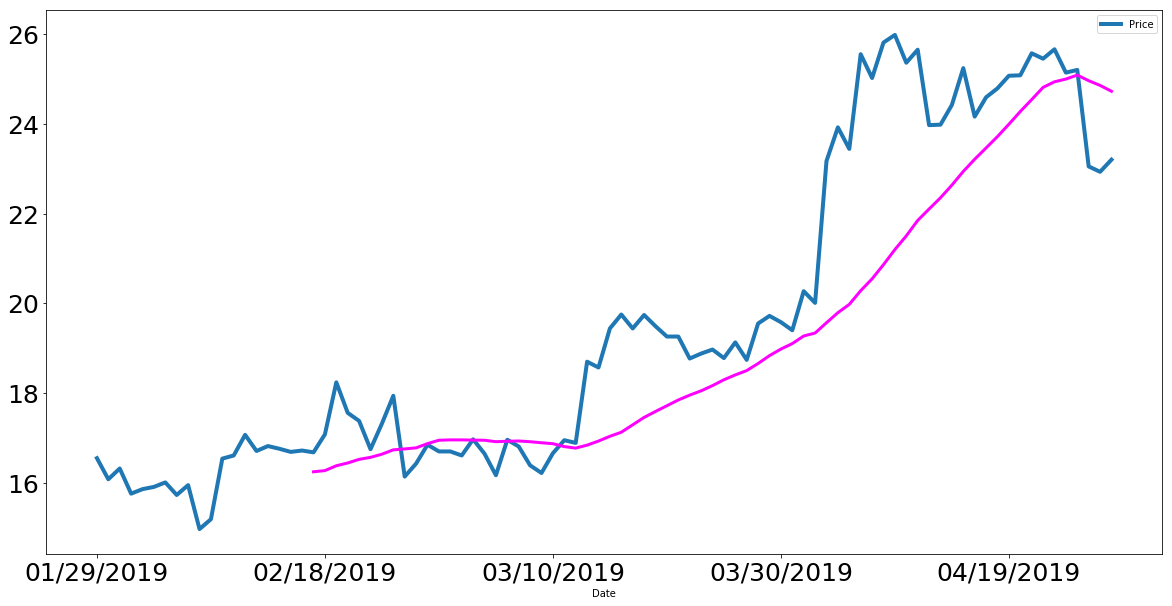

In [202]:
# Chart:
df_decred["Open"]=df_decred["Open"].astype(float)
df_decred.plot("Date", "Open", label="Price", figsize=(20,10), linewidth=4, fontsize=25)

# rolling_mean = stellar["Open"].rolling(window=5).mean()
rolling_mean2 = decred["Open"].rolling(window=20).mean()

# rolling_mean.plot(label='5 Day SMA', color='orange')
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3)

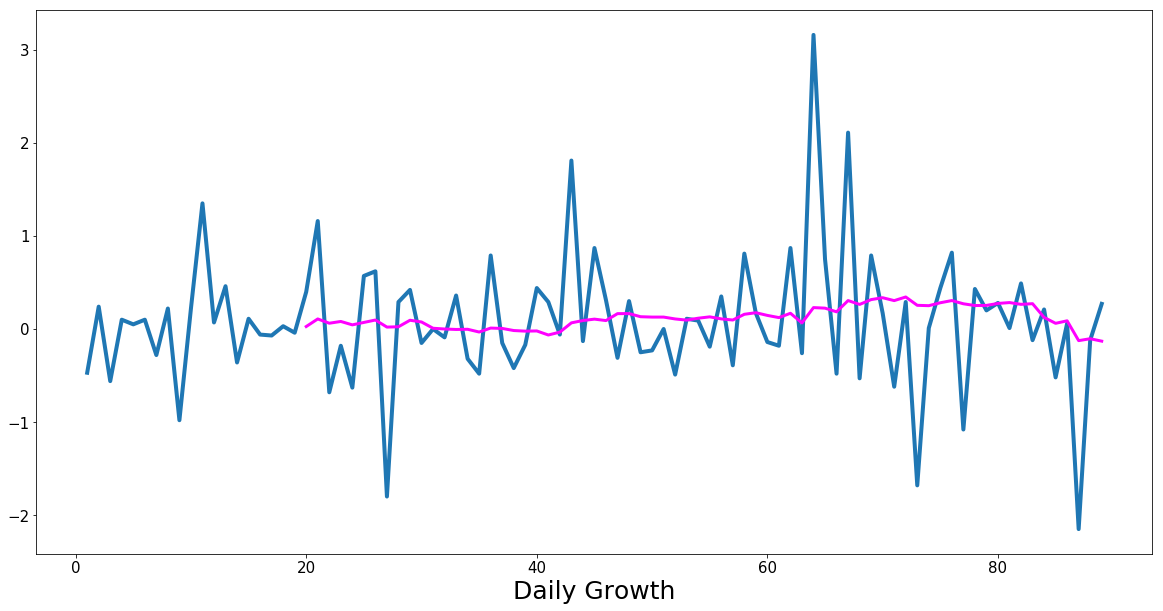

In [203]:
# Growth Chart (First Difference):
decred_diff = df_decred["Open"].diff()
df_decred["Open"].diff().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Daily Growth', fontsize=25);

# MA:
rolling_mean2 = decred_diff.rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

In [204]:
# Volatility (Standard Devation):
print("Decred Daily Avarage Volatility: " + str(round(np.std(df_decred["Open"])*100, 2)) +"%")

# 3 Month Returns:
print("Decred 3 Month Return: " + str(round(max(df_decred["Open"])*100/min(df_decred["Open"]),2)) +"%")

Stellar Daily Avarage Volatility: 350.08%
Stellar 3 Month Return: 173.55%


In [206]:
# Transformation:
df_decred["Open"]=df_decred["Open"].astype(float)
decred_open = decred['Open']
decred_diff = df_decred["Open"].diff()
decred_log = np.log(decred_open)
decred_log_diff = np.log(decred_open).diff(periods=1).dropna()
# BAT_log_diff.describe()

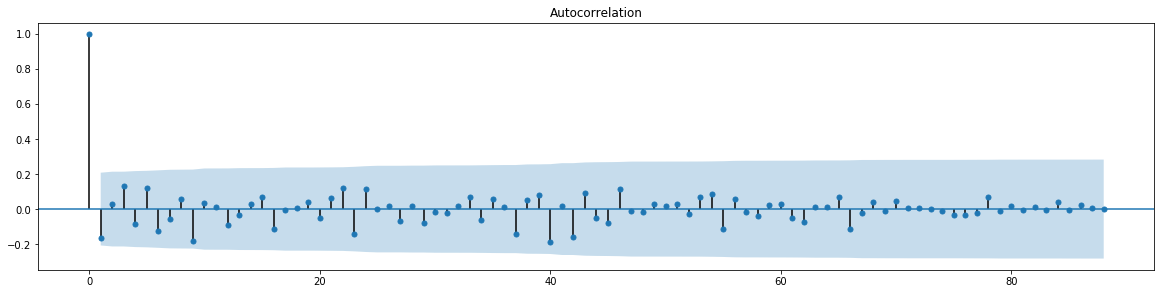

In [207]:
# Autocorrelation function (First difference and log):
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(decred_log_diff, alpha=0.05, ax=ax1)

In [214]:
# Train and test set:
train = decred_log[:65]
test = decred_log[65:]

In [215]:
# Predicted values:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(trend='c', disp=-1)
# print(model_fit.summary())

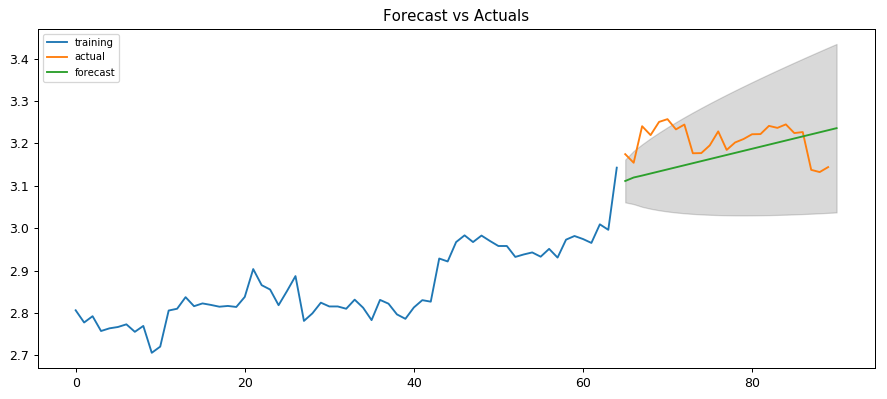

In [217]:
# Forecasting:
fc, se, conf = model_fit.forecast(steps=26, alpha=0.15)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=90)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ICON:

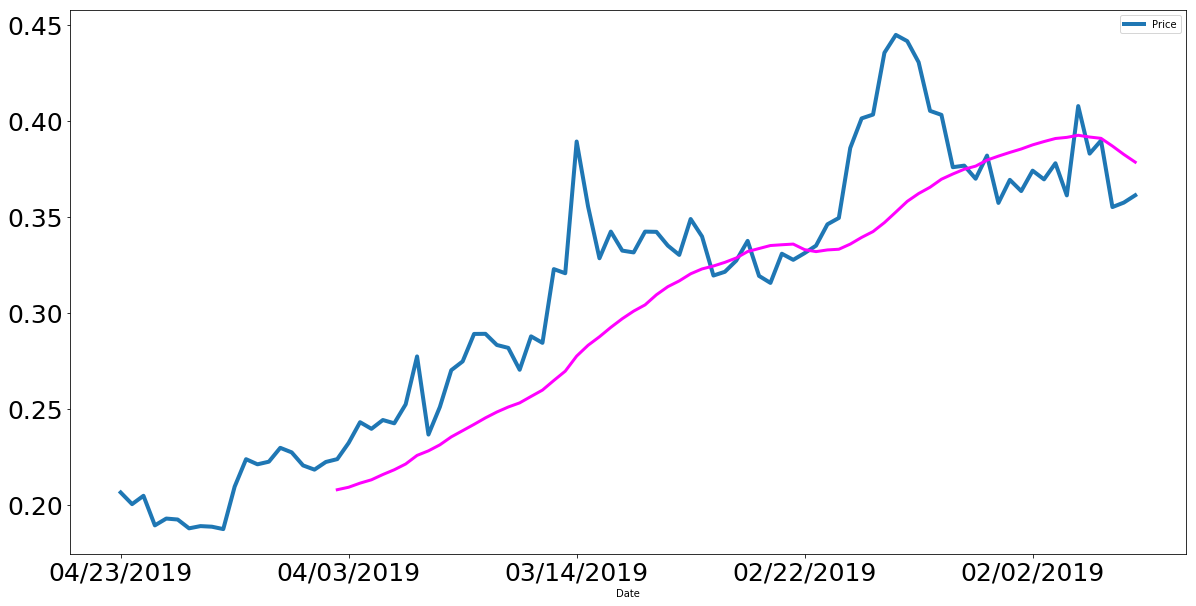

In [219]:
# Chart:
df_ICON["Open"]=df_ICON["Open"].astype(float)
df_ICON.plot("Date", "Open", label="Price", figsize=(20,10), linewidth=4, fontsize=25)

# rolling_mean = stellar["Open"].rolling(window=5).mean()
rolling_mean2 = ICON["Open"].rolling(window=20).mean()

# rolling_mean.plot(label='5 Day SMA', color='orange')
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3)

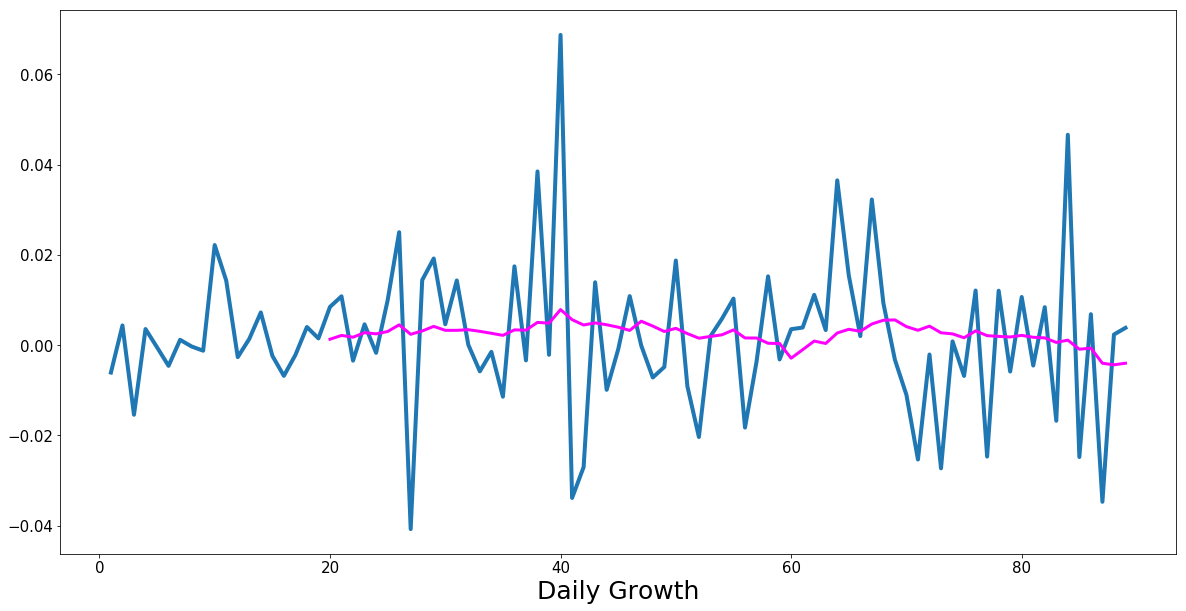

In [221]:
# Growth Chart (First Difference):
ICON_diff = df_ICON["Open"].diff()
df_ICON["Open"].diff().plot(figsize=(20,10), linewidth=4, fontsize=20)
plt.xlabel('Daily Growth', fontsize=25);

# MA:
rolling_mean2 = ICON_diff.rolling(window=20).mean()
rolling_mean2.plot(label='20 Day SMA', color='magenta', linewidth=3, fontsize=15)

In [222]:
# Volatility (Standard Devation):
print("ICON Daily Avarage Volatility: " + str(round(np.std(df_ICON["Open"])*100, 2)) +"%")

# 3 Month Returns:
print("ICON 3 Month Return: " + str(round(max(df_ICON["Open"])*100/min(df_ICON["Open"]),2)) +"%")

ICON Daily Avarage Volatility: 7.13%
ICON 3 Month Return: 237.75%


In [223]:
# Transformation:
df_ICON["Open"]=df_ICON["Open"].astype(float)
ICON_open = ICON['Open']
ICON_diff = df_ICON["Open"].diff()
ICON_log = np.log(ICON_open)
ICON_log_diff = np.log(ICON_open).diff(periods=1).dropna()
# BAT_log_diff.describe()

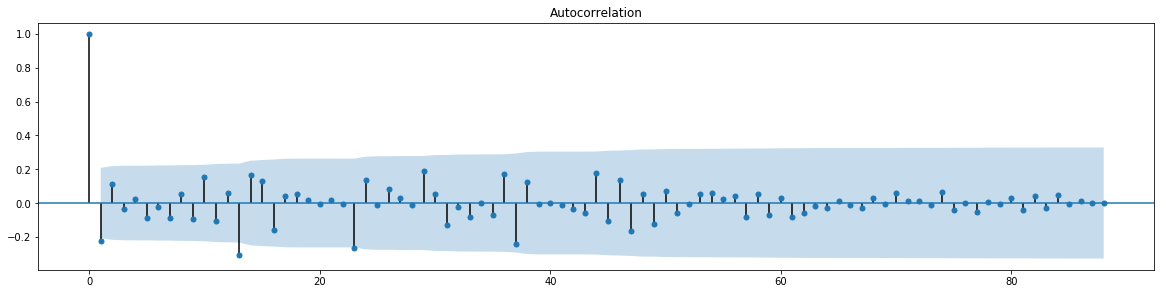

In [224]:
# Autocorrelation function (First difference and log):
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ICON_log_diff, alpha=0.05, ax=ax1)

In [228]:
# Train and test set:
train = ICON_log[:60]
test = ICON_log[60:]

In [229]:
# Predicted values:
model = ARIMA(train, order=(1,1,1)) # Not stationary
model_fit = model.fit(trend='c', disp=-1)
# print(model_fit.summary())

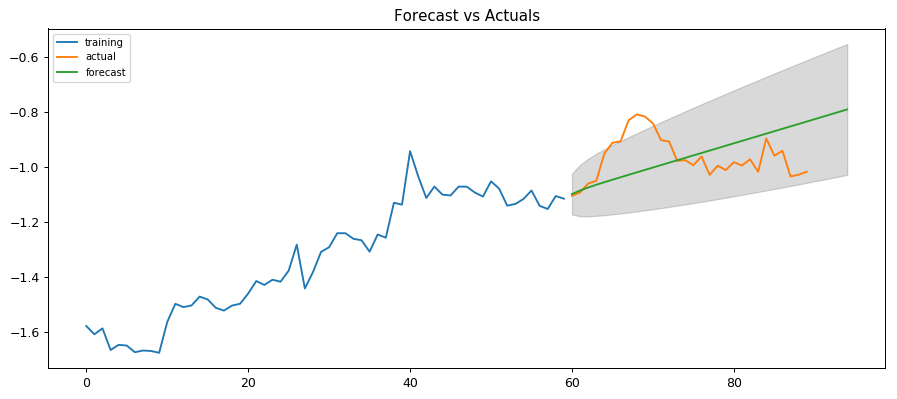

In [231]:
# Forecasting:
fc, se, conf = model_fit.forecast(steps=35, alpha=0.15)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=90)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=0.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

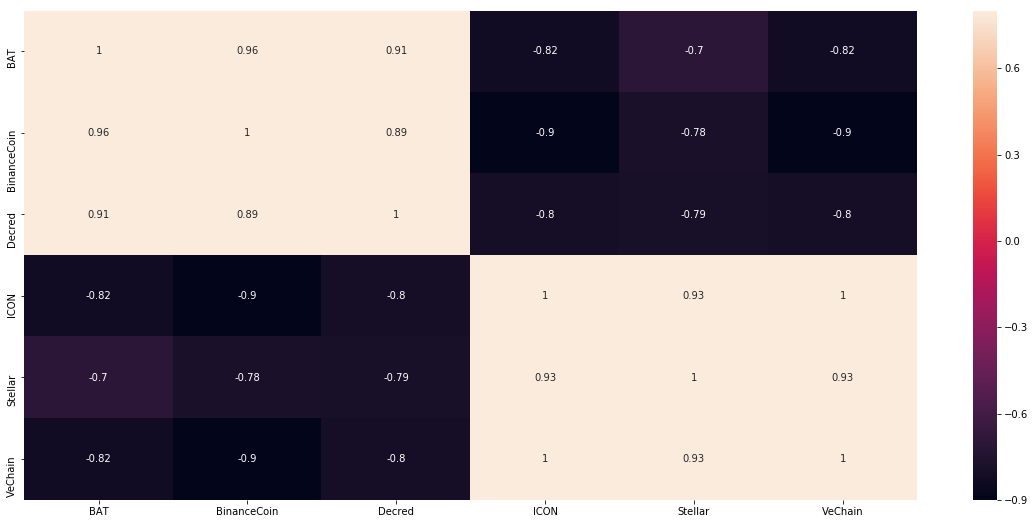

In [24]:
# Correlation Matrix:
with PdfPages(r'C:\Users\rciri\Desktop\WiseTrust\Coin Excel\Correlation_heatmap.pdf') as export_pdf:
    corr = df_crypto.corr()
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True);
    export_pdf.savefig()
    plt.show();

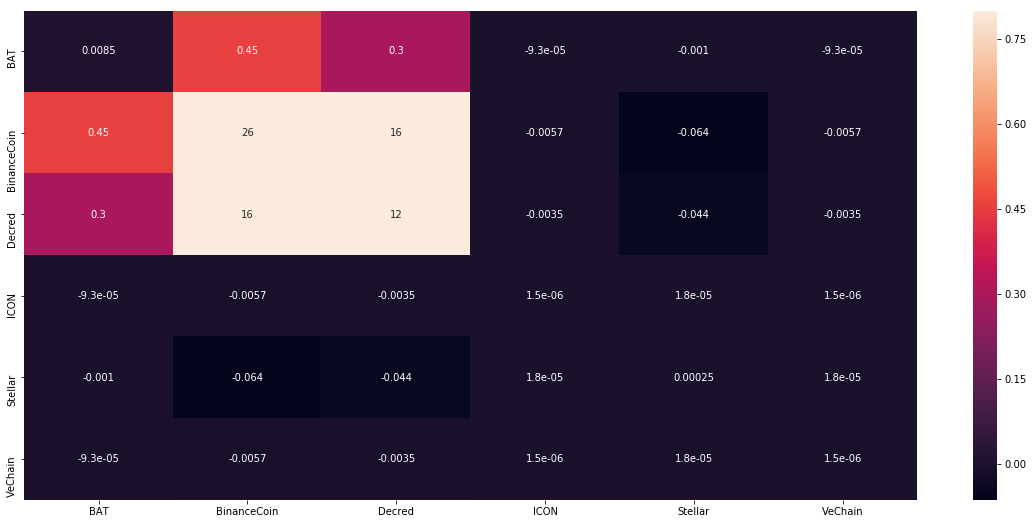

In [10]:
# Covariance Matrix:
with PdfPages(r'C:\Users\rafae\Desktop\WiseTrust\Coin Excel\Covariance_heatmap.pdf') as export_pdf:
    cov = df_crypto.cov()
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(cov, vmax=.8,annot_kws={'size': 10}, annot=True);
    export_pdf.savefig()
    plt.show();

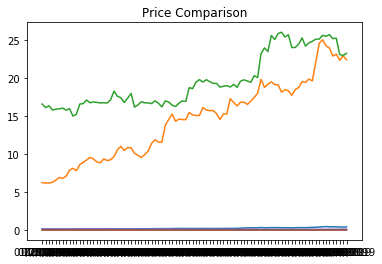

In [8]:
df_crypto["BAT"] = df_crypto["BAT"].astype(float)
df_crypto["BinanceCoin"] = df_crypto["BinanceCoin"].astype(float)
df_crypto["Decred"] = df_crypto["Decred"].astype(float)
df_crypto["ICON"] = df_crypto["ICON"].astype(float)
df_crypto["Stellar"] = df_crypto["Stellar"].astype(float)
df_crypto["VeChain"] = df_crypto["VeChain"].astype(float)

fig, ax = plt.subplots()
ax.plot(df_crypto["Date"], df_crypto["BAT"])
ax.plot(df_crypto["Date"], df_crypto["BinanceCoin"])
ax.plot(df_crypto["Date"], df_crypto["Decred"])
ax.plot(df_crypto["Date"], df_crypto["ICON"])
ax.plot(df_crypto["Date"], df_crypto["Stellar"])
ax.plot(df_crypto["Date"], df_crypto["VeChain"])
ax.set_title("Price Comparison")

plt.show()